# Commercial district Information Analysis

* What kind of small businesses are the most in Seoul?
* Is there any distinctive difference among district?
* How much change its survival rate after Covid19?

## Get ready Jupyter 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic') # window 한글 폰트 설정
plt.rc('axes',unicode_minus=False) # 한글폰트 인 경우 unicode가 깨지는 경우 발생하는것을 막기 위해 unicode_minus =False설정
%matplotlib inline

## Data load

In [2]:
df=pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_서울_202012.csv',sep='|')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17163092,도전최강달인왕만두,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1174010200102170000018014,고덕그라시움,서울특별시 강동구 고덕로 333,134082,5224.0,NaN,NaN,NaN,127.159471,37.556197
1,17120456,이때,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1144012400103900067027687,NaN,서울특별시 마포구 동교로38안길 7,121867,3982.0,NaN,NaN,NaN,126.924660,37.562176
2,17175350,L.A.D,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1144012000103950112010755,NaN,서울특별시 마포구 잔다리로3안길 23,121840,4043.0,NaN,NaN,NaN,126.919845,37.550689
3,17175311,제이씨에스푸드,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1162010200101180033018722,NaN,서울특별시 관악구 신림로14길 3,151856,8839.0,NaN,NaN,NaN,126.937790,37.471190
4,22767534,BYC상신점,상신점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1171011300100360000022458,성암빌딩,서울특별시 송파구 오금로 527,138110,5768.0,NaN,1,NaN,127.147321,37.493054


In [3]:
df.shape

(346577, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346577 entries, 0 to 346576
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     346577 non-null  int64  
 1   상호명        346576 non-null  object 
 2   지점명        58969 non-null   object 
 3   상권업종대분류코드  346577 non-null  object 
 4   상권업종대분류명   346577 non-null  object 
 5   상권업종중분류코드  346577 non-null  object 
 6   상권업종중분류명   346577 non-null  object 
 7   상권업종소분류코드  346577 non-null  object 
 8   상권업종소분류명   346577 non-null  object 
 9   표준산업분류코드   326327 non-null  object 
 10  표준산업분류명    326327 non-null  object 
 11  시도코드       346577 non-null  int64  
 12  시도명        346577 non-null  object 
 13  시군구코드      346577 non-null  int64  
 14  시군구명       346577 non-null  object 
 15  행정동코드      346577 non-null  int64  
 16  행정동명       346442 non-null  object 
 17  법정동코드      346577 non-null  int64  
 18  법정동명       346577 non-null  object 
 19  지번코드       346577 non-n

## Missing Data

In [5]:
df.isnull().sum()

상가업소번호            0
상호명               1
지점명          287608
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      20250
표준산업분류명       20250
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명            135
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         67823
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        304620
건물관리번호            0
건물명          180007
도로명주소             0
구우편번호             0
신우편번호             2
동정보          319182
층정보          130203
호정보          290683
경도                0
위도                0
dtype: int64

In [6]:
temp=round(df.isnull().sum()/df.shape[0],2)*100
temp

상가업소번호        0.0
상호명           0.0
지점명          83.0
상권업종대분류코드     0.0
상권업종대분류명      0.0
상권업종중분류코드     0.0
상권업종중분류명      0.0
상권업종소분류코드     0.0
상권업종소분류명      0.0
표준산업분류코드      6.0
표준산업분류명       6.0
시도코드          0.0
시도명           0.0
시군구코드         0.0
시군구명          0.0
행정동코드         0.0
행정동명          0.0
법정동코드         0.0
법정동명          0.0
지번코드          0.0
대지구분코드        0.0
대지구분명         0.0
지번본번지         0.0
지번부번지        20.0
지번주소          0.0
도로명코드         0.0
도로명           0.0
건물본번지         0.0
건물부번지        88.0
건물관리번호        0.0
건물명          52.0
도로명주소         0.0
구우편번호         0.0
신우편번호         0.0
동정보          92.0
층정보          38.0
호정보          84.0
경도            0.0
위도            0.0
dtype: float64

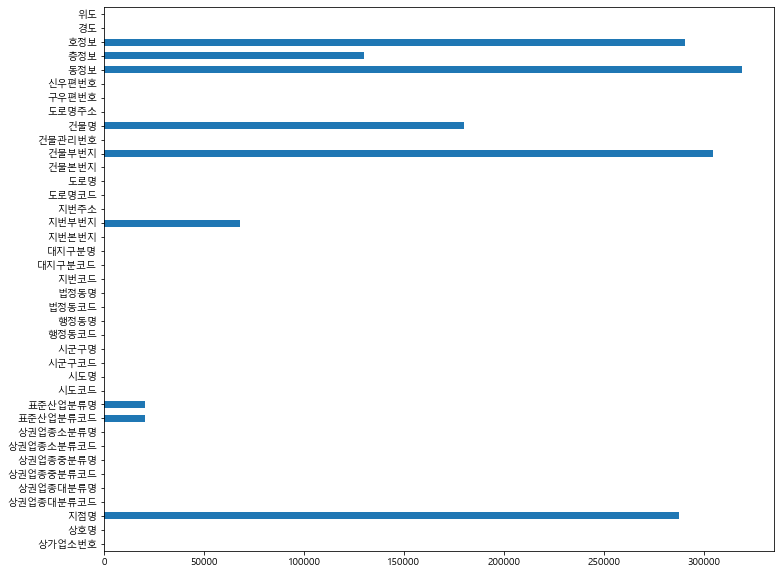

In [7]:
df.isnull().sum().plot.barh(figsize=(12,10))

In [10]:
df=df[temp[temp.values<40].index]
df.shape

(346577, 34)

## Data Analysis

In [13]:
df.describe()

,상가업소번호,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,지번부번지,도로명코드,건물본번지,구우편번호,신우편번호,경도,위도
count,3.465770e+05,346577.0,346577.000000,3.465770e+05,3.465770e+05,3.465770e+05,346577.000000,346577.000000,278754.000000,3.465770e+05,346577.000000,346577.000000,346575.000000,346577.000000,346577.000000
mean,1.973555e+07,11.0,11446.338288,1.144696e+09,1.144645e+09,1.144646e+18,1.001085,413.207521,35.631259,1.144670e+11,147.416193,136651.104721,5201.955707,126.995568,37.544837
std,4.982442e+06,0.0,198.861055,1.988480e+07,1.988540e+07,1.988549e+16,0.032920,418.299461,110.393699,1.988617e+09,273.157704,14193.822627,2123.262500,0.082468,0.048671
min,2.895210e+06,11.0,11110.000000,1.111052e+09,1.111010e+09,1.111010e+18,1.000000,1.000000,1.000000,1.111020e+11,0.000000,100011.000000,1000.000000,126.768169,37.434081
25%,1.625134e+07,11.0,11260.000000,1.126059e+09,1.126010e+09,1.126010e+18,1.000000,96.000000,4.000000,1.126031e+11,19.000000,131220.000000,3450.000000,126.925046,37.505075
50%,2.025360e+07,11.0,11470.000000,1.147055e+09,1.147010e+09,1.147010e+18,1.000000,293.000000,11.000000,1.147031e+11,48.000000,136865.000000,5277.000000,127.011197,37.541273
75%,2.444549e+07,11.0,11650.000000,1.165053e+09,1.165010e+09,1.165010e+18,1.000000,635.000000,28.000000,1.165031e+11,167.000000,143926.000000,6805.000000,127.057350,37.572212
max,2.852486e+07,11.0,11740.000000,1.174070e+09,1.174011e+09,1.174070e+18,2.000000,9999.000000,9992.000000,1.174049e+11,3318.000000,158885.000000,8866.000000,127.182588,37.690787


In [14]:
df.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,층정보,경도,위도
0,17163092,도전최강달인왕만두,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,...,117403124001,서울특별시 강동구 고덕로,333,1174010200102170000018014,서울특별시 강동구 고덕로 333,134082,5224.0,NaN,127.159471,37.556197
1,17120456,이때,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,...,114404139119,서울특별시 마포구 동교로38안길,7,1144012400103900067027687,서울특별시 마포구 동교로38안길 7,121867,3982.0,NaN,126.924660,37.562176
2,17175350,L.A.D,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,...,114404139571,서울특별시 마포구 잔다리로3안길,23,1144012000103950112010755,서울특별시 마포구 잔다리로3안길 23,121840,4043.0,NaN,126.919845,37.550689
3,17175311,제이씨에스푸드,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,...,116204160502,서울특별시 관악구 신림로14길,3,1162010200101180033018722,서울특별시 관악구 신림로14길 3,151856,8839.0,NaN,126.937790,37.471190
4,22767534,BYC상신점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,NaN,...,117103123014,서울특별시 송파구 오금로,527,1171011300100360000022458,서울특별시 송파구 오금로 527,138110,5768.0,1,127.147321,37.493054


In [15]:
df['상권업종대분류명'].unique()

array(['음식', '소매', '학문/교육', '생활서비스', '부동산', '관광/여가/오락', '숙박', '스포츠'],
      dtype=object)

In [17]:
df["상권업종대분류명"].nunique() 

8

In [18]:
df['상권업종중분류명'].unique()

array(['한식', '의복의류', '학원-보습교습입시', '건강/미용식품', '취미/오락관련소매', '기타서비스업',
       '운송/배달/택배', '유흥주점', '학원-창업취업취미', '자동차/자동차용품', '가정/주방/인테리어',
       '부동산중개', '사무/문구/컴퓨터', '사진/광학/정밀기기소매', '패스트푸드', '종합소매점', '화장품소매',
       '닭/오리요리', '도서관/독서실', '커피점/카페', '무도/유흥/가무', '자동차/이륜차', '선물/팬시/기념품',
       '이/미용/건강', '분식', '음/식료품소매', 'PC/오락/당구/볼링등', '세탁/가사서비스', '기타판매업',
       '운동/경기용품소매', '가방/신발/액세서리', '시계/귀금속소매', '학원-예능취미체육', '학원기타',
       '가전제품소매', '물품기기대여', '의약/의료품소매', '책/서적/도서', '제과제빵떡케익', '일식/수산물',
       '학문교육기타', '예식/의례/관혼상제', '양식', '사진', '학원-음악미술무용', '애견/애완/동물', '대행업',
       '철물/난방/건설자재소매', '별식/퓨전요리', '모텔/여관/여인숙', '주택수리', '호텔/콘도', '가구소매',
       '유아용품', '중식', '유아교육', '요가/단전/마사지', '광고/인쇄', '주유소/충전소', '기타음식업',
       '학원-어학', '민박/하숙', '평가/개발/관리', '인력/고용/용역알선', '연극/영화/극장',
       '개인/가정용품수리', '학원-자격/국가고시', '개인서비스', '장례/묘지', '예술품/골동품/수석/분재',
       '대중목욕탕/휴게', '부페', '법무세무회계', '행사/이벤트', '중고품소매/교환', '페인트/유리제품소매',
       '분양', '학원-컴퓨터', '음식배달서비스', '스포츠/운동', '종교용품판매', '경마/경륜/성인오락',
       '캠프/별장/펜션', '

In [19]:
df['상권업종중분류명'].nunique()

93

In [21]:
df["상권업종소분류명"].unique()

array(['한식/백반/한정식', '셔츠/내의/속옷', '학원-입시', '건강원', '악기판매', '상품전시', '종합이삿짐대행',
       '민속주점', '학원-디자인', '타이어판매', '인테리어/욕실용품/커튼', '부동산중개', '컴퓨터전문매장',
       '카메라판매', '일반의류', '토스트전문', '편의점', '화장품판매점', '삼계탕전문', '족발/보쌈전문',
       '곱창/양구이전문', '독서실', '커피전문점/카페/다방', '패스트푸드', '노래방', '호프/맥주', '핸드폰소매',
       '세차장', '꽃집/꽃배달', '비만/피부관리', '사무용기기소매', '국수/만두/칼국수', '수퍼마켓',
       '청과물소매', '사무/문구용품', '컴퓨터/사무용기기종합', '기원', '남성의류전문점', '얼음가게',
       '자동차정비/카센타', '캐쥬얼/스포츠의류', '세탁소/빨래방', '패션디자인', '아동복판매', '복권판매',
       '운동/경기용품', '청소/소독', '가방/가죽제품소매', '섬유/직물/주단', '정육점', '시계/귀금속',
       '양품점', '지물판매', '백화점', '레크레이션지도/상담', '컴퓨터/주변기기', '학원(종합)', '일반가전제품',
       '여성미용실', '렌트카', '인터넷PC방', '의료용품소매', '서적/신문소매', '떡전문', '건강식품판매',
       '사업경영상담', '참치전문점', '빠/카페/스탠드빠', '운동/코치학교', '생수판매', '예식장/예식서비스',
       '주방가구판매', '한복/갈옷/민속옷', '정통양식/경양식', '사진관', '부대찌개/섞어찌개', '안경원',
       '등산용품판매', '피아노/바이올린/기타', '애견/애완/동물사육판매', '닭내장/닭발요리', '이민유학알선',
       '음식점-일식', '셔터/새시판매', '죽전문점', '모텔/여관/여인숙', '주택수리종합', '도시락전문점',
       '해장국/

In [23]:
df["상권업종소분류명"].nunique()

669

In [24]:
df['시도명'].value_counts()

서울특별시    346577
Name: 시도명, dtype: int64

In [25]:
df['시군구명'].value_counts()

강남구     37482
서초구     20317
송파구     18673
중구      16937
강서구     16674
광진구     16530
영등포구    16262
마포구     14869
강동구     14349
종로구     13883
동대문구    13718
관악구     13551
은평구     12647
구로구     11855
성북구     11844
용산구     11543
노원구     11450
양천구     10610
중랑구     10450
서대문구     9940
성동구      9531
금천구      8936
동작구      8692
도봉구      7929
강북구      7905
Name: 시군구명, dtype: int64